## MARC 2022 Training Workshop on Machine Learning and NLP
## Part I: Machine Learning

### Jiangang Hao, ETS, contact: <jhao@ets.org>
----

### 1: Loading packages and data

In [1]:
# --- Data Transformation ---
from sklearn.datasets import load_iris, load_boston
from sklearn import preprocessing
import pandas as pd
import warnings; warnings.simplefilter('ignore')

In [2]:
data = load_iris()
X = data.data
y = data.target

In [3]:
X.shape

(150, 4)

In [4]:
y.shape

(150,)

### 2: Preprocessing data

In [5]:
X = preprocessing.scale(X)

### 3: Supervised Learning Models

In [6]:
# --- Import Supervised Learning methods ---- 

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier # for Random Forest
from sklearn.ensemble import GradientBoostingClassifier # for Gradient Boosting Machine


In [7]:
model_SVM = SVC()
model_RF = RandomForestClassifier()
model_GBM = GradientBoostingClassifier()
model_ANN = MLPClassifier()
model_MaxEnt = LogisticRegression()

In [8]:
model_SVM

SVC()

In [9]:
model_RF

RandomForestClassifier()

In [10]:
model_GBM

GradientBoostingClassifier()

In [11]:
model_ANN

MLPClassifier()

In [12]:
model_MaxEnt

LogisticRegression()

### 4: Training and Validation

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [14]:
tmp1 = model_SVM.fit(X_train,y_train)
tmp2 = model_RF.fit(X_train,y_train)
tmp3 = model_GBM.fit(X_train,y_train)
tmp4 = model_ANN.fit(X_train,y_train)
tmp5 = model_MaxEnt.fit(X_train,y_train)

In [15]:
y_pred_MaxEnt = model_MaxEnt.predict(X_test)
y_pred_SVM = model_SVM.predict(X_test)
y_pred_RF = model_RF.predict(X_test)
y_pred_ANN = model_ANN.predict(X_test)
y_pred_GBM = model_GBM.predict(X_test)

### 5: Model Evalutation

In [16]:
# --- Model evaluation and selection ---
from sklearn.metrics import accuracy_score, cohen_kappa_score

In [17]:
accuracy_score(y_pred_MaxEnt, y_test)

0.9866666666666667

In [18]:
accuracy_score(y_pred_SVM, y_test)

0.9866666666666667

In [19]:
accuracy_score(y_pred_RF, y_test)

0.9866666666666667

In [20]:
accuracy_score(y_pred_ANN, y_test)

0.9866666666666667

In [21]:
accuracy_score(y_pred_GBM, y_test)

0.92

In [22]:
cohen_kappa_score(y_pred_MaxEnt, y_test)

0.9798711755233495

In [23]:
cohen_kappa_score(y_pred_SVM, y_test)

0.9798711755233495

In [24]:
cohen_kappa_score(y_pred_RF, y_test)

0.9798711755233495

In [25]:
cohen_kappa_score(y_pred_ANN, y_test)

0.9798711755233495

In [26]:
cohen_kappa_score(y_pred_GBM, y_test)

0.8792270531400966

### 6: Cross-validation Approach

In [27]:
# --- Cross validation and hyper-paramter search
from sklearn.model_selection import cross_val_score

In [28]:
cross_val_score(model_MaxEnt, X, y,cv=3)

array([0.98, 0.96, 0.96])

In [29]:
cross_val_score(model_SVM, X, y,cv=3)

array([0.98, 0.96, 0.96])

In [30]:
cross_val_score(model_RF, X, y,cv=3)

array([0.98, 0.94, 0.98])

In [31]:
cross_val_score(model_ANN, X, y,cv=3)

array([0.96, 0.94, 0.94])

In [32]:
cross_val_score(model_GBM, X, y,cv=3)

array([0.98, 0.94, 0.98])

### 7: Hypter-parameter Searching

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
hyper_parameters = {'kernel':('linear', 'rbf'), 'C':[1,5,10,100]}

In [35]:
model_grid = GridSearchCV(model_SVM, hyper_parameters,cv=3)

In [36]:
model_grid.fit(X,y)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 100], 'kernel': ('linear', 'rbf')})

In [37]:
model_grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [38]:
model_grid.best_score_

0.98

# Unsupervised Learning

### 1. Hiearchical Clustering

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
import matplotlib.pyplot as plt
%matplotlib inline

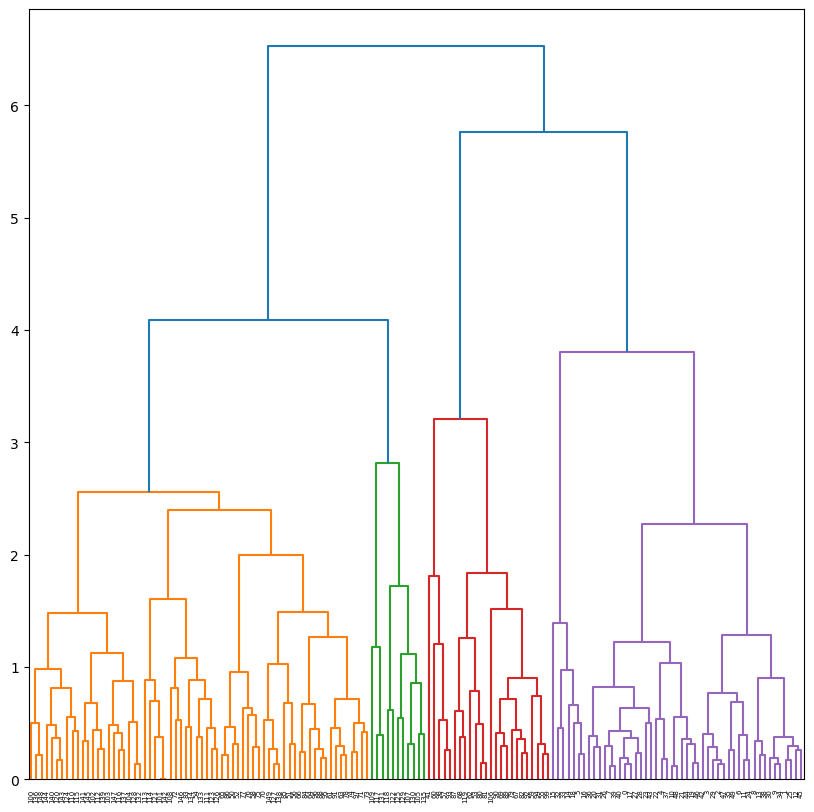

In [40]:
# single linkage, complete linkage, ward
Z = linkage(X,'complete')
plt.figure(figsize=(10,10))
#t=dendrogram(Z)
t=dendrogram(Z,color_threshold=4)

In [41]:
# decide the cluster member assignments
cluster_label = fcluster(Z,4, criterion='distance')

In [42]:
cluster_label

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 1, 1, 1,
       1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 3,
       1, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [43]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [44]:
# compare with the true label
accuracy_score(abs(cluster_label -3),data.target)

0.25333333333333335

In [45]:
# confusion matrix
pd.crosstab(abs(cluster_label -3),data.target)

col_0,0,1,2
row_0,,,
0,1,21,2
1,49,0,11
2,0,29,37


### 2. K-mean clustering

In [46]:
from sklearn.cluster import KMeans

In [47]:
kmeans_cluster = KMeans(n_clusters=3, random_state=0).fit(X)

In [48]:
kmeans_cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [49]:
kmeans_cluster.cluster_centers_

array([[-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612]])